תכנון:
1. להוציא כתבות על מניות רלוונטיות מעיתונים עסקיים וכלליים
2. לנתח סנטימנט לכל כתבה
3. לחשב מדדים רלוונטיים - סנטימנט ממוצע, נטימנט עסקי ממוצע, מספר כתבות בכל אחד מהם
4. לשלוף סדרות זמן של המניות
5. מודל שחוזה את המניוח על בסיס הכתבות של יום לפני

In [1]:
!pip install newsapi-python


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout


In [64]:
KR_stock_data = yf.download('KR', start='2010-02-04', end='2020-06-04')


[*********************100%***********************]  1 of 1 completed


In [152]:
KR_stock_data_weekly = yf.download('KR', start='2010-02-04', end='2020-06-04',interval = "1wk")



[*********************100%***********************]  1 of 1 completed


In [153]:
KR_stock_data_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,10.705000,10.820000,10.500000,10.590000,8.280290,36903000
2010-02-08,10.585000,10.750000,10.475000,10.680000,8.350657,52007200
2010-02-15,10.745000,11.075000,10.670000,11.045000,8.674615,44488800
2010-02-22,11.040000,11.210000,10.650000,11.050000,8.678543,76157400
2010-03-01,11.090000,11.420000,11.010000,11.370000,8.929866,75320200
...,...,...,...,...,...,...
2020-05-04,32.580002,33.520000,31.830000,33.340000,31.200983,38438200
2020-05-11,33.450001,34.500000,32.259998,32.509998,30.424229,50381900
2020-05-18,32.430000,32.580002,31.500000,32.369999,30.436024,41291200


In [65]:
KR_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-04,10.705000,10.820000,10.565000,10.580000,8.272470,21101000
2010-02-05,10.575000,10.680000,10.500000,10.590000,8.280290,15802000
2010-02-08,10.585000,10.655000,10.475000,10.565000,8.260743,12450600
2010-02-09,10.700000,10.705000,10.605000,10.685000,8.354568,10143600
2010-02-10,10.640000,10.700000,10.590000,10.615000,8.336895,9254800
...,...,...,...,...,...,...
2020-05-28,33.330002,33.799999,32.009998,32.060001,30.144547,13326500
2020-05-29,32.169998,32.709999,31.620001,32.619999,30.671089,16545000
2020-06-01,32.709999,33.220001,32.430000,32.490002,30.548859,6933400


In [53]:
news = pd.read_csv("raw_partner_headlines.csv")

In [59]:
count_stock = news.groupby('stock')['stock'].count()

In [61]:
count_stock.sort_values(ascending=False)

stock
KR       3314
GXC      3238
PGJ      3082
YINN     3027
JPM      2873
         ... 
ARCPP       1
HGH         1
GFNSL       1
DIA         1
JBK         1
Name: stock, Length: 6552, dtype: int64

In [62]:
KR_data = news[news['stock']=='KR']

In [63]:
KR_data

,Unnamed: 0,headline,url,publisher,date,stock
956318,958554,Kroger First Quarter Conference Call with Inve...,http://www.gurufocus.com/news/1155641/kroger-f...,GuruFocus,2020-06-04 00:00:00,KR
956319,958555,"Nordstrom (JWN) Q1 Loss Wider Than Expected, S...",http://www.zacks.com/stock/news/951775/nordstr...,Zacks,2020-05-29 00:00:00,KR
956320,958556,Looking for Dividend Growth? Here Are 5 Solid ...,http://www.zacks.com/stock/news/951451/looking...,Zacks,2020-05-29 00:00:00,KR
956321,958557,Kroger: Capital Preservation and More at a Goo...,http://www.gurufocus.com/news/1149842/kroger-c...,GuruFocus,2020-05-28 00:00:00,KR
956322,958558,SpartanNash (SPTN) Q1 Earnings Surpass Estimat...,http://www.zacks.com/stock/news/950122/spartan...,Zacks,2020-05-28 00:00:00,KR
...,...,...,...,...,...,...
959627,961863,Kroger 2010 Forecast Could Fall Short,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR
959628,961864,Cisco Systems: Tuesday's Headlines,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR
959629,961865,Rocket Stocks for the Week,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-08 00:00:00,KR
959630,961866,Cramer's 'Mad Money' Recap: Next Week's Game P...,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-05 00:00:00,KR


In [68]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer,TFAutoModelForSequenceClassification
import torch
from transformers import BertTokenizer, BertForSequenceClassification,TFBertForSequenceClassification
from transformers import pipeline

def santiment_prediction(data,col_name,model=None,tokenizer = None):
    if not model:
        model = TFAutoModelForSequenceClassification.from_pretrained("KernAI/stock-news-distilbert",from_pt=True)
    if not tokenizer:
        tokenizer = AutoTokenizer.from_pretrained("KernAI/stock-news-distilbert")
    classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
    data["santiment_pred"] =data[col_name].apply(lambda sent: list(classifier(sent)[0].values()))
    data["power_pred"] = data['santiment_pred'].apply(lambda a: a[1])
    data['santiment_pred'] = data['santiment_pred'].apply(lambda a: a[0])
    return data

In [69]:
KR_data = santiment_prediction(KR_data,'headline')

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
C:\Users\yotam\AppData\Local\Temp\ipykernel_9960\3082261633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["santiment_pred"] =data[col_name].apply(lambda sent: list(classifier(sent)[0].values()))
C:\Users\yotam\AppData\Local\Temp\ipykernel_9960\3082261633.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [70]:
KR_data

,Unnamed: 0,headline,url,publisher,date,stock,santiment_pred,power_pred
956318,958554,Kroger First Quarter Conference Call with Inve...,http://www.gurufocus.com/news/1155641/kroger-f...,GuruFocus,2020-06-04 00:00:00,KR,neutral,0.997541
956319,958555,"Nordstrom (JWN) Q1 Loss Wider Than Expected, S...",http://www.zacks.com/stock/news/951775/nordstr...,Zacks,2020-05-29 00:00:00,KR,negative,0.997922
956320,958556,Looking for Dividend Growth? Here Are 5 Solid ...,http://www.zacks.com/stock/news/951451/looking...,Zacks,2020-05-29 00:00:00,KR,positive,0.997774
956321,958557,Kroger: Capital Preservation and More at a Goo...,http://www.gurufocus.com/news/1149842/kroger-c...,GuruFocus,2020-05-28 00:00:00,KR,positive,0.982564
956322,958558,SpartanNash (SPTN) Q1 Earnings Surpass Estimat...,http://www.zacks.com/stock/news/950122/spartan...,Zacks,2020-05-28 00:00:00,KR,positive,0.996887
...,...,...,...,...,...,...,...,...
959627,961863,Kroger 2010 Forecast Could Fall Short,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR,negative,0.997844
959628,961864,Cisco Systems: Tuesday's Headlines,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR,neutral,0.996630
959629,961865,Rocket Stocks for the Week,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-08 00:00:00,KR,positive,0.990289
959630,961866,Cramer's 'Mad Money' Recap: Next Week's Game P...,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-05 00:00:00,KR,neutral,0.997635


In [73]:
KR_data['santiment'] = np.where(KR_data['santiment_pred']=='positive',1,0)
KR_data['santiment'] = np.where(KR_data['santiment_pred']=='negative',-1,KR_data['santiment'])
KR_data['santiment'] = KR_data['santiment']*KR_data['power_pred']

C:\Users\yotam\AppData\Local\Temp\ipykernel_9960\1155711251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KR_data['santiment'] = np.where(KR_data['santiment_pred']=='positive',1,0)
C:\Users\yotam\AppData\Local\Temp\ipykernel_9960\1155711251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KR_data['santiment'] = np.where(KR_data['santiment_pred']=='negative',-1,KR_data['santiment'])
C:\Users\yotam\AppData\Local\Temp\ipykernel_9960\1155711251.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [74]:
KR_data

,Unnamed: 0,headline,url,publisher,date,stock,santiment_pred,power_pred,santiment
956318,958554,Kroger First Quarter Conference Call with Inve...,http://www.gurufocus.com/news/1155641/kroger-f...,GuruFocus,2020-06-04 00:00:00,KR,neutral,0.997541,0.000000
956319,958555,"Nordstrom (JWN) Q1 Loss Wider Than Expected, S...",http://www.zacks.com/stock/news/951775/nordstr...,Zacks,2020-05-29 00:00:00,KR,negative,0.997922,-0.997922
956320,958556,Looking for Dividend Growth? Here Are 5 Solid ...,http://www.zacks.com/stock/news/951451/looking...,Zacks,2020-05-29 00:00:00,KR,positive,0.997774,0.997774
956321,958557,Kroger: Capital Preservation and More at a Goo...,http://www.gurufocus.com/news/1149842/kroger-c...,GuruFocus,2020-05-28 00:00:00,KR,positive,0.982564,0.982564
956322,958558,SpartanNash (SPTN) Q1 Earnings Surpass Estimat...,http://www.zacks.com/stock/news/950122/spartan...,Zacks,2020-05-28 00:00:00,KR,positive,0.996887,0.996887
...,...,...,...,...,...,...,...,...,...
959627,961863,Kroger 2010 Forecast Could Fall Short,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR,negative,0.997844,-0.997844
959628,961864,Cisco Systems: Tuesday's Headlines,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-09 00:00:00,KR,neutral,0.996630,0.000000
959629,961865,Rocket Stocks for the Week,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-08 00:00:00,KR,positive,0.990289,0.990289
959630,961866,Cramer's 'Mad Money' Recap: Next Week's Game P...,https://www.benzinga.com/content/thestreet-com...,webmaster,2010-03-05 00:00:00,KR,neutral,0.997635,0.000000


In [76]:
KR_sentiment = KR_data.groupby('date')['santiment'].mean()

In [91]:
KR_s = KR_sentiment.to_frame().reset_index(drop=False)

In [103]:
KR_s['date'] =pd.to_datetime(pd.to_datetime(KR_s['date']).dt.strftime('%Y-%m-%d'))

In [107]:
KR_s= KR_s.set_index('date')

In [108]:
KR_s

,santiment
date,
2010-02-04,0.000000
2010-03-05,0.000000
2010-03-08,0.990289
2010-03-09,-0.332615
2010-03-11,0.993631
...,...
2020-05-20,0.655545
2020-05-21,0.000000
2020-05-28,0.595328


In [109]:
KR_stock_data['santiment']= KR_s['santiment']

In [122]:
KR_stock_data=KR_stock_data.fillna(0)

In [120]:
KR_stock_data['close_change'] = KR_stock_data['Close'].diff()/KR_stock_data['Close']

In [127]:
KR_stock_data['close_change_dir'] = np.where(KR_stock_data['close_change']>0,1,0)

In [128]:
KR_stock_data[['close_change','santiment','close_change_dir']].corr()

,close_change,santiment,close_change_dir
close_change,1.000000,0.038376,0.667675
santiment,0.038376,1.000000,0.034299
close_change_dir,0.667675,0.034299,1.000000


In [129]:
KR_s_lag = KR_s.reset_index()

In [131]:
KR_s_lag['date'] = KR_s_lag['date']+timedelta(days=1)

In [134]:
KR_s_lag= KR_s_lag.set_index('date')

In [136]:
KR_stock_data['santiment_yestoday'] = KR_s_lag['santiment']

In [137]:
KR_stock_data=KR_stock_data.fillna(0)

In [139]:
KR_stock_data['santiment']

Date
2010-02-04    0.000000
2010-02-05    0.000000
2010-02-08    0.000000
2010-02-09    0.000000
2010-02-10    0.000000
                ...   
2020-05-28    0.595328
2020-05-29   -0.000074
2020-06-01    0.000000
2020-06-02    0.000000
2020-06-03    0.000000
Name: santiment, Length: 2600, dtype: float64

In [142]:
KR_stock_data[['close_change','close_change_dir','santiment','santiment_yestoday']].corr()

,close_change,close_change_dir,santiment,santiment_yestoday
close_change,1.000000,0.667675,0.038376,-0.006135
close_change_dir,0.667675,1.000000,0.034299,-0.010581
santiment,0.038376,0.034299,1.000000,0.078693
santiment_yestoday,-0.006135,-0.010581,0.078693,1.000000


In [143]:
KR_stock_data

,Open,High,Low,Close,Adj Close,Volume,santiment,close_change,close_change_dir,santiment_yestoday
Date,,,,,,,,,,
2010-02-04,10.705000,10.820000,10.565000,10.580000,8.272470,21101000,0.000000,0.000000,0,0.000000
2010-02-05,10.575000,10.680000,10.500000,10.590000,8.280290,15802000,0.000000,0.000944,1,0.000000
2010-02-08,10.585000,10.655000,10.475000,10.565000,8.260743,12450600,0.000000,-0.002366,0,0.000000
2010-02-09,10.700000,10.705000,10.605000,10.685000,8.354568,10143600,0.000000,0.011231,1,0.000000
2010-02-10,10.640000,10.700000,10.590000,10.615000,8.336895,9254800,0.000000,-0.006595,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-05-28,33.330002,33.799999,32.009998,32.060001,30.144547,13326500,0.595328,-0.038054,0,0.000000
2020-05-29,32.169998,32.709999,31.620001,32.619999,30.671089,16545000,-0.000074,0.017167,1,0.595328
2020-06-01,32.709999,33.220001,32.430000,32.490002,30.548859,6933400,0.000000,-0.004001,0,0.000000


Text(0, 0.5, 'Prices ($)')

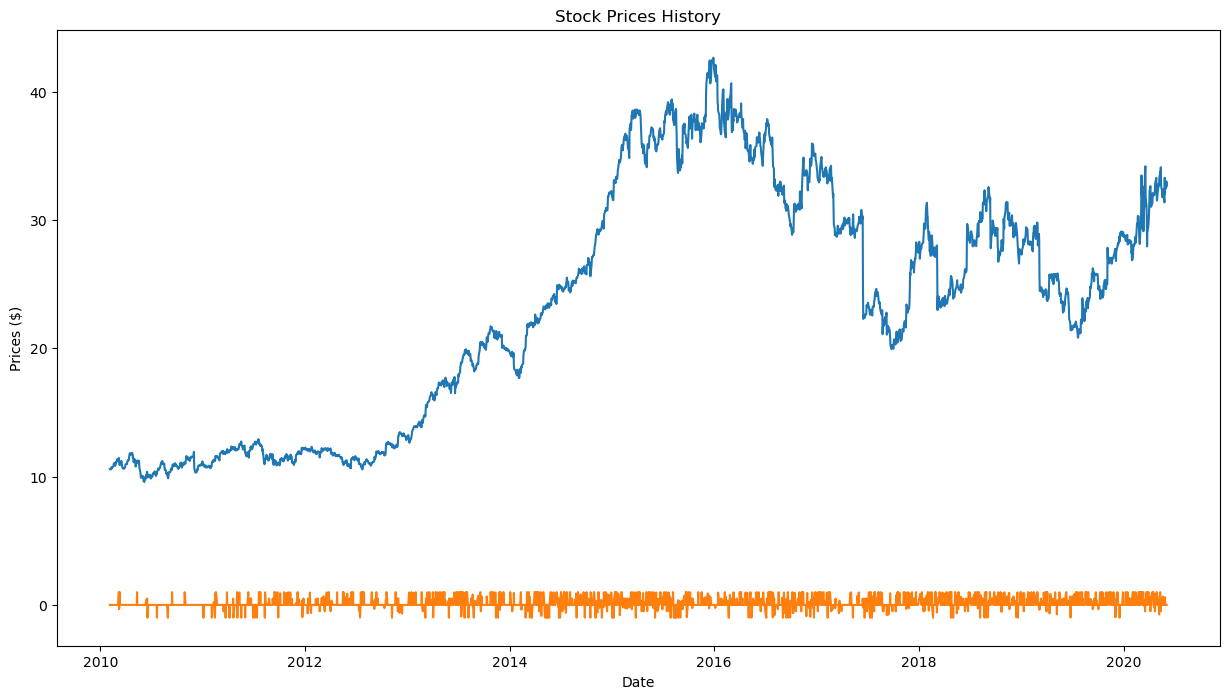

In [147]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(KR_stock_data['Close'])
plt.plot(KR_stock_data['santiment'])

plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

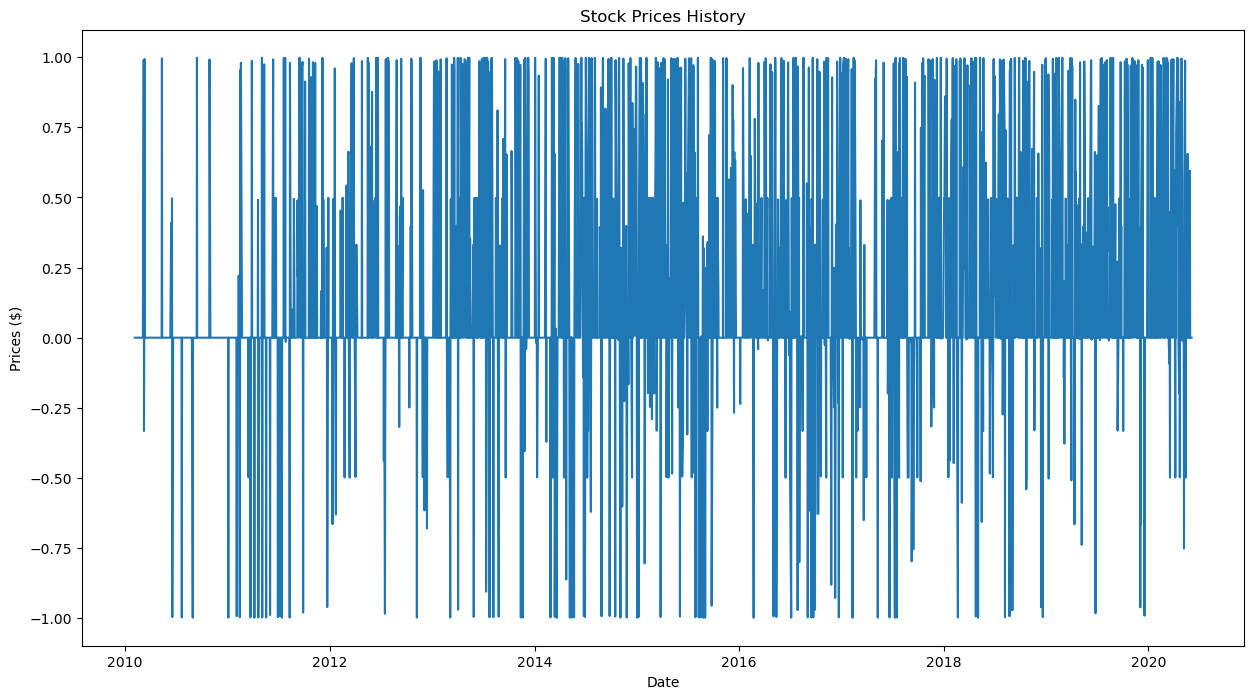

In [150]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(KR_stock_data['santiment'])

plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

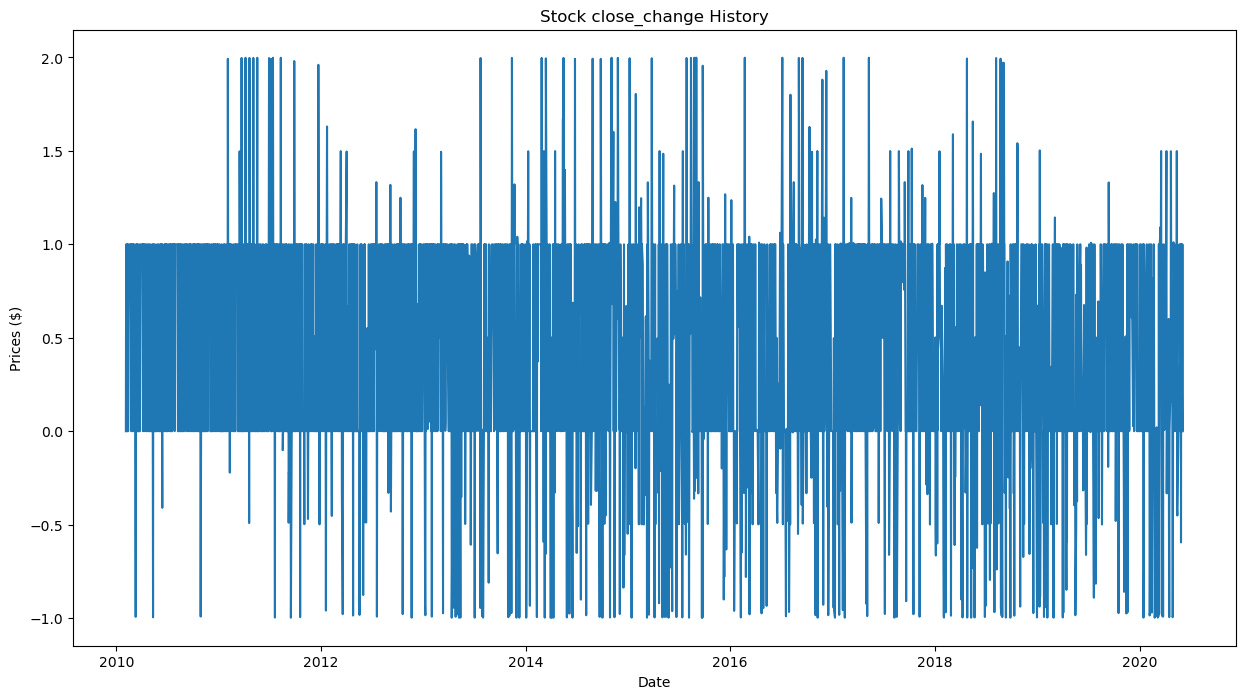

In [149]:
plt.figure(figsize=(15, 8))
plt.title('Stock close_change History')
plt.plot(KR_stock_data['close_change_dir']-KR_stock_data['santiment'])

plt.xlabel('Date')
plt.ylabel('Prices ($)')

# newssapi api

In [25]:
def get_sources(category = None):
    newsapi = NewsApiClient(api_key='7637d3c1f1584c9dab4a8dbce63ebc81')
    sources = newsapi.get_sources()
    if category is not None:
        rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
    else:
        rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']
    return rez


In [26]:
business = get_sources('business')

In [27]:
business

['australian-financial-review',
 'bloomberg',
 'business-insider',
 'business-insider-uk',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [28]:
from newsapi import NewsApiClient
from datetime import date, timedelta

phrase = 'Apple stock'
newsapi = NewsApiClient(api_key= '7637d3c1f1584c9dab4a8dbce63ebc81')
my_date = '2023-01-01'
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date,#.isoformat(),
                                  language="en",
                                  sources = ",".join(business)
                                  #sort_by="relevancy",
                                  )
                                  #page_size = 5)
#for article in articles['articles']:
#    print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])

NewsAPIException: {'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2023-06-11, but you have requested 2023-01-01. You may need to upgrade to a paid plan.'}

In [17]:
articles['articles'][4]#['title'] #dict[list[dict]]

{'source': {'id': None, 'name': 'AppleInsider'},
 'author': 'news@appleinsider.com (Christine McKee)',
 'title': "Amazon's early Prime Day deals on iPads, Apple Pencil drive prices to as low as $79",
 'description': 'Early Prime Day 2023 iPad deals have reached a fever pitch, with hidden markdowns on iPads driving prices down to as low as $249.99 and Apple Pencil models as low as $79.Save on Apple iPads & accessories\r\nRead more...',
 'url': 'https://appleinsider.com/articles/23/07/08/amazons-early-prime-day-deals-on-ipads-apple-pencil-drive-prices-to-as-low-as-79',
 'urlToImage': 'https://photos5.appleinsider.com/gallery/55280-112310-early-ipad-prime-day-deals-copy-xl.jpg',
 'publishedAt': '2023-07-08T21:25:53Z',
 'content': 'Early Prime Day 2023 iPad deals have reached a fever pitch, with hidden markdowns on iPads driving prices down to as low as $249.99 and Apple Pencil models as low as $79.\r\nSave on Apple iPads &amp; a… [+1755 chars]'}

# news from kagle

from: https://www.kaggle.com/datasets/rmisra/news-category-dataset

In [29]:
News_Category_Dataset = pd.read_json('News_Category_Dataset_v3.json', lines=True)


In [35]:
News_Category_Dataset['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [49]:
cat = ['BUSINESS','MONEY']

In [40]:
business_news = News_Category_Dataset[News_Category_Dataset['category'] == cat[0]]

In [51]:
money_news = News_Category_Dataset[News_Category_Dataset['category'] == cat[1]]

In [52]:
money_news

,link,headline,category,short_description,authors,date
1796,https://www.huffpost.com/entry/holiday-shoppin...,Why You Should Get Your Holiday Shopping Done ...,MONEY,"Supply chain issues are out of your control, b...",Caroline Bologna,2021-10-21
3259,https://www.huffpost.com/entry/gamestop-stock-...,Investors Who Made Money Trading GameStop Have...,MONEY,"Those who recently flipped shares of GameStop,...",Casey Bond,2021-02-04
3335,https://www.huffpost.com/entry/tax-season-dela...,The IRS Delayed Tax Season. Here's How To Get ...,MONEY,Last-minute changes to tax laws in 2020 mean t...,Casey Bond,2021-01-22
4623,https://www.huffpost.com/entry/stimulus-check-...,Where's My Stimulus Check? How To Track Your C...,MONEY,"If your check was sent but you never got it, y...",Casey Bond,2020-06-16
4854,https://www.huffpost.com/entry/pay-taxes-coron...,Do You Have To Pay Taxes On Your Coronavirus S...,MONEY,Getting a payment won't mean a higher tax bill...,Casey Bond,2020-05-08
...,...,...,...,...,...,...
206515,https://www.huffingtonpost.com/entry/bad-boss-...,Bad Bosses: 9 Reasons Your Manager Stinks,MONEY,"Here are nine signs your superior may not be, ...",Emily Cohn,2012-02-29
206524,https://www.huffingtonpost.com/entry/eating-ou...,Save On Eating Out By Putting The Menu Down,MONEY,We're not going to tell you to stop eating out...,Emily Cohn,2012-02-29
206528,https://www.huffingtonpost.com/entry/irs-tax-s...,Tax Scams To Look Out For This Year,MONEY,7. Schemers file fake forms to claim credits t...,Emily Cohn,2012-02-29
206530,https://www.huffingtonpost.com/entry/401k-mist...,How To Manage My 401(k),MONEY,"""A 401(k) in and of itself is no guarantee tha...",Emily Cohn,2012-02-29


In [45]:
business_news.iloc[162].loc["short_description"]
# "short_description" is the statement 

'A new bill will require all public restrooms in New York City to have diaper changing tables.'

In [47]:
business_news.loc[:,"short_description"]

162       They follow in the footsteps of REI workers in...
353       Delaware Chancery Judge Kathaleen McCormick de...
632       Starbucks' move follows McDonald's exit from t...
690       Cryptocurrency trading platform Coinbase has l...
727       At 3.6%, unemployment nearly reached the lowes...
                                ...                        
209507    The general pattern of the FDIC closing banks ...
209508    Don't like keeping all of your money stuffed u...
209509    After 30 years, "People Greeters" will no long...
209510    For decades, as crises have assailed developin...
209511    "Analysts at Adobe combined historical purchas...
Name: short_description, Length: 5992, dtype: object